In [1]:
#import de todas as bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:

# Leitura do DataFrame
wine = pd.read_csv('winequalityN.csv')
#visualização das primeiras linhas do DataFrame
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:

# Verificando se há valores nulos no DataFrame, retornando a soma de valores nulos por coluna
wine.dropna(inplace=True)
wine.isnull().sum()


type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

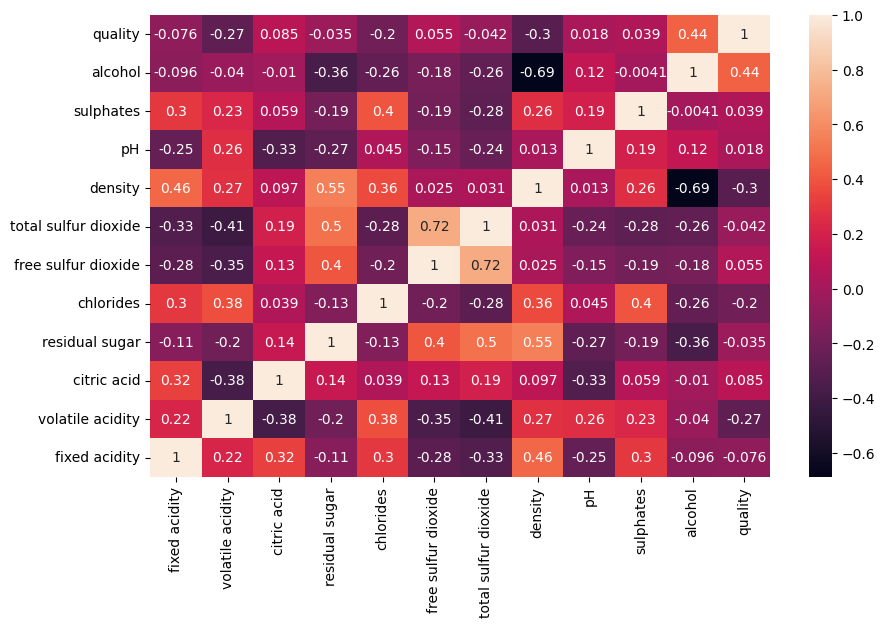

In [5]:
# Excluir colunas não numéricas
numeric_wine = wine.select_dtypes(exclude=['object'])

# Calcular correlação para as colunas numéricas
correlation_matrix = numeric_wine.corr()

# Plotar a matriz de correlação
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True)
plt.ylim(0, 12)
plt.show()

In [6]:
#excluindo colunas com strings
wine = wine.drop(['type'], axis=1)
#separação dos dados em treino e teste
x_values = wine.drop(['alcohol'],axis=1).values
y_values = wine['alcohol'].values

x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.2, random_state=42)

 # normalização
pipe = Pipeline([('scaler', StandardScaler())])
x_train = pipe.fit_transform(x_train)
x_test = pipe.transform(x_test)

# regressão (treinamento)
my_model = LinearRegression()
my_model.fit(x_train, y_train)
print(my_model.score(x_test, y_test)) # r2 squared


0.822867726346168


In [7]:
 #regressão (teste)
test_pred = my_model.predict(x_test)
train_pred = my_model.predict(x_train)


#função para avaliar o modelo
def print_evaluate(real, predicted):
  mae = metrics.mean_absolute_error(real, predicted)
  mse = metrics.mean_squared_error(real, predicted)
  rmse = np.sqrt(metrics.mean_squared_error(real, predicted))
  r2_square = metrics.r2_score(real, predicted)
  
  print('MAE:', mae)
  print('MSE:', mse)
  print('RMSE:', rmse)
  print('R2 Square', r2_square)
  print('__________________________________')
  
print("Dados de teste:")
print_evaluate(y_test, test_pred)
print("\nDados de treinamento:")
print_evaluate(y_train, train_pred)

Dados de teste:
MAE: 0.3989843612973598
MSE: 0.26681814760634337
RMSE: 0.5165444294601805
R2 Square 0.822867726346168
__________________________________

Dados de treinamento:
MAE: 0.3902429824443842
MSE: 0.2907334124101731
RMSE: 0.5391970070486047
R2 Square 0.7923181301457404
__________________________________


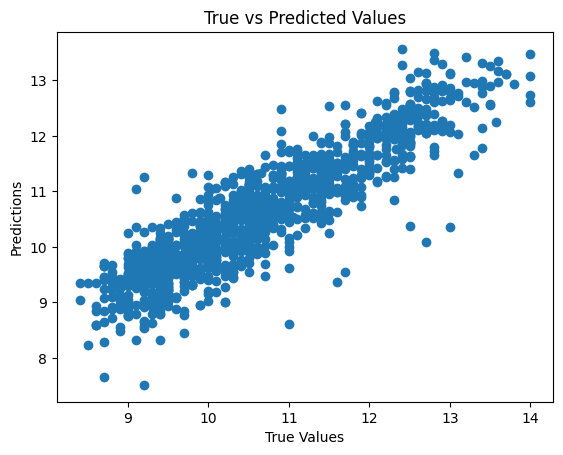

10.469660863957882 [ 0.67997065  0.26082324  0.06907571  0.93566117 -0.00667731 -0.00666862
 -0.23469732 -1.72110406  0.45068922  0.19007688  0.12494332] 0.822867726346168


In [8]:
# Plotando os resultados
plt.scatter(y_test, test_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()


print(my_model.intercept_, my_model.coef_, my_model.score(x_test, y_test))